In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from IPython.core.display import clear_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# load balance sheet into df
balance_sheets = pd.read_csv("balance_sheets.csv")
balance_sheets.head()

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Symbol
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,16193000000,18149000000,3242000000,3353000000,14460000000,29673000000,45361000000,9000000,576252803,MMM
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,16267000000,18232000000,3181000000,3297000000,14448000000,29236000000,44824000000,9000000,578638253,MMM
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,16819000000,18169000000,3126000000,3330000000,13760000000,29020000000,44255000000,9000000,579675002,MMM
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,17989000000,18783000000,3278000000,3462000000,12867000000,29404000000,43821000000,9000000,577749638,MMM
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,18429000000,19582000000,2840000000,3324000000,11880000000,29570000000,43285000000,9000000,576821878,MMM


In [3]:
# load cash flow into df
cash_flow = pd.read_csv("cash_flow.csv")
cash_flow.head()

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Symbol
0,2021-09-30,USD,1874000000,None,None,29000000,166000000,476000000,343000000,-13000000,...,None,None,None,None,-441000000,86000000,1437000000,None,1434000000,MMM
1,2021-06-30,USD,1887000000,None,None,73000000,472000000,472000000,394000000,132000000,...,None,None,None,None,-316000000,187000000,1525000000,29000000,1524000000,MMM
2,2021-03-31,USD,1688000000,None,None,197000000,509000000,460000000,310000000,205000000,...,None,None,None,None,62000000,293000000,2000000,-66000000,1624000000,MMM
3,2020-12-31,USD,2515000000,None,None,286000000,82000000,498000000,422000000,-52000000,...,None,None,None,None,102000000,104000000,1390000000,59000000,1389000000,MMM
4,2020-09-30,USD,2480000000,None,None,94000000,-113000000,481000000,368000000,128000000,...,None,None,None,None,89000000,89000000,1417000000,42000000,1430000000,MMM


In [4]:
# load earnings into df
earnings = pd.read_csv("earnings.csv")
earnings.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,Symbol
0,2021-09-30,2021-10-26,2.45,2.2084,0.2416,10.94,MMM
1,2021-06-30,2021-07-27,2.59,2.2765,0.3135,13.7711,MMM
2,2021-03-31,2021-04-27,2.77,2.2932,0.4768,20.7919,MMM
3,2020-12-31,2021-01-26,2.38,2.1678,0.2122,9.7887,MMM
4,2020-09-30,2020-10-27,2.43,2.2669,0.1631,7.1948,MMM


In [5]:
# load income statements into df
income_statements = pd.read_csv("income_statements.csv")
income_statements.head()

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,Symbol
0,2021-09-30,USD,4089000000,8942000000,4853000000,4853000000,1788000000,1819000000,482000000,1950000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,MMM
1,2021-06-30,USD,4231000000,8950000000,4719000000,4719000000,1971000000,1746000000,514000000,1880000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,MMM
2,2021-03-31,USD,4326000000,8851000000,4525000000,4525000000,1994000000,1808000000,524000000,1941000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,MMM
3,2020-12-31,USD,4195000000,8583000000,4388000000,4388000000,1849000000,1890000000,456000000,3189000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,MMM
4,2020-09-30,USD,4047000000,8350000000,4303000000,4303000000,1909000000,1677000000,461000000,1814000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,MMM


In [6]:
# load monthly prices into df
monthly_prices = pd.read_csv("monthly_prices.csv")
monthly_prices.columns = ['Date', 'open', 'high', 'low', 'close', 'volume', 'Symbol']
monthly_prices.head()

,Date,open,high,low,close,volume,Symbol
0,2022-01-21,178.32,181.780,172.5600,172.65,34039389,MMM
1,2021-12-31,172.55,179.180,169.1801,177.63,48251474,MMM
2,2021-11-30,178.53,186.300,169.9400,170.04,47872133,MMM
3,2021-10-29,176.25,183.820,173.7800,178.68,48241875,MMM
4,2021-09-30,194.55,195.606,175.3700,175.42,67366254,MMM


In [7]:
# merge all dataframes together
historical_data = pd.merge(balance_sheets, cash_flow, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, earnings, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, income_statements, on = ['Symbol', 'fiscalDateEnding'])
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,None,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,None,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,None,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,None,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,None,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,None,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,None,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,None,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,None,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000


In [8]:
historical_data['currentQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN


In [9]:
historical_data['nextQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN,NaN


In [10]:
# get all tickers and quarterly dates
tickers = historical_data['Symbol'].unique()
quarterlyDates = historical_data[['fiscalDateEnding', 'Symbol']]
quarterlyDates

,fiscalDateEnding,Symbol
0,2021-09-30,MMM
1,2021-06-30,MMM
2,2021-03-31,MMM
3,2020-12-31,MMM
4,2020-09-30,MMM
...,...,...
9164,2017-12-31,ZTS
9165,2017-09-30,ZTS
9166,2017-06-30,ZTS
9167,2017-03-31,ZTS


In [11]:
# get current quarter price
for i in (historical_data.index):
    date = historical_data.loc[i]['fiscalDateEnding']
    sym = historical_data.loc[i]['Symbol']
    year_month = date[:7]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    backup = company_price
    company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
    if len(company_price) == 0:
        #backup = backup[backup['Date'] == min(backup['Date'])]
        #historical_data.at[i, 'currentQuarterPrice'] = backup.iloc[0]['close']
        historical_data = historical_data.drop([i])
        #continue
    else:
        company_price = company_price[company_price['Date'] == max(company_price['Date'])]
        historical_data.at[i, 'currentQuarterPrice'] = company_price.iloc[0]['close']

In [12]:
# get next quarter price
months = ['03', '06', '09', '12']
for i in (historical_data.index):
    sym = historical_data.loc[i]['Symbol']
    date = historical_data.loc[i]['fiscalDateEnding']
    year = date[:4]
    month = date[5:7]
    day = date[9:]
    test = historical_data[historical_data['Symbol'] == sym]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    company_price = company_price[company_price['Date'] > date]
    if month in months:
        idx = months.index(month)
        if idx == len(months) - 1:
            idx = 0
            year = str(int(year) + 1)
        else:
            idx += 1
        year_month = year + '-' + months[idx]
        company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
        if len(company_price) == 0:
            historical_data = historical_data.drop([i])
        else:
            company_price = company_price[company_price['Date'] == max(company_price['Date'])]
            historical_data.at[i, 'nextQuarterPrice'] = company_price.iloc[0]['close']
    else:
        historical_data = historical_data.drop([i])

In [13]:
# check for nan values in nextQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['nextQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [14]:
# check for nan values in currentQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['currentQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [15]:
# get non numeric columns
non_numeric_columns = []
for i in historical_data.columns:
    try:
        float(historical_data[i].iloc[0])
    except:
        non_numeric_columns.append(i)
non_numeric_columns

['fiscalDateEnding',
 'reportedCurrency_x',
 'longTermInvestments',
 'Symbol',
 'reportedCurrency_y',
 'paymentsForOperatingActivities',
 'proceedsFromOperatingActivities',
 'paymentsForRepurchaseOfPreferredStock',
 'dividendPayoutPreferredStock',
 'proceedsFromIssuanceOfCommonStock',
 'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
 'proceedsFromIssuanceOfPreferredStock',
 'changeInExchangeRate',
 'reportedDate',
 'reportedCurrency',
 'investmentIncomeNet',
 'depreciation']

In [16]:
correlation = historical_data.drop(non_numeric_columns, axis = 1)
correlation = correlation.replace('None', np.NaN)
correlation = correlation.astype('float64')
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(correlation))
newDf.columns = correlation.columns
newDf.index = correlation.index
correlation = newDf
correlation = (correlation - correlation.mean()) / correlation.std()
correlation = correlation.corr()['nextQuarterPrice'].drop(['nextQuarterPrice'])
correlation = correlation[correlation > .1].index
correlation

Index(['currentNetReceivables', 'currentAccountsPayable',
       'capitalLeaseObligations', 'totalShareholderEquity', 'commonStock',
       'operatingCashflow', 'depreciationDepletionAndAmortization',
       'capitalExpenditures', 'profitLoss',
       'paymentsForRepurchaseOfCommonStock', 'paymentsForRepurchaseOfEquity',
       'netIncome_x', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'sellingGeneralAndAdministrative',
       'researchAndDevelopment', 'operatingExpenses', 'nonInterestIncome',
       'depreciationAndAmortization', 'incomeBeforeTax',
       'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax',
       'ebit', 'ebitda', 'netIncome_y', 'currentQuarterPrice'],
      dtype='object')

In [109]:
len(historical_data[historical_data['fiscalDateEnding'] > '2019-09-30'])

3483

In [111]:
# neural network predicting price
df = historical_data
X_training_index = df[df['fiscalDateEnding'] < '2020-09-30'].index
X_testing_index = df[df['fiscalDateEnding'] >= '2020-09-30'].index
y_training_index = df['nextQuarterPrice'][df['fiscalDateEnding'] < '2020-09-30'].index
y_testing_index = df['nextQuarterPrice'][df['fiscalDateEnding'] >= '2020-09-30'].index
currentPrice = df['currentQuarterPrice']
X = df.drop(non_numeric_columns, axis = 1)
X = X.drop(['nextQuarterPrice'], axis = 1)
X = X.replace('None', np.NaN)
X = X.astype('float64')
X = (X - X.mean()) / X.std()
X['currentQuarterPrice'] = currentPrice
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(X))
newDf.columns = X.columns
newDf.index = X.index
X = newDf
X = X[correlation]
# Y = df['inc_or_dec']
Y = df['nextQuarterPrice']
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
#Y = np_utils.to_categorical(encoded_Y)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25) # SPY fix into consecutive years
X_train = X.loc[X_training_index]
X_test = X.loc[X_testing_index]
y_train = Y.loc[y_training_index]
y_test = Y.loc[y_testing_index]
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(28, )))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
# model.add(layers.Dense(1, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) #softmax #tfidf
model.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
47/47 [==============================] - 1s 2ms/step - loss: 52111.8672 - mean_absolute_error: 116.0826
Epoch 2/10
47/47 [==============================] - 0s 1ms/step - loss: 29266.5273 - mean_absolute_error: 81.4232
Epoch 3/10
47/47 [==============================] - 0s 1ms/step - loss: 1497.9307 - mean_absolute_error: 15.6918
Epoch 4/10
47/47 [==============================] - 0s 1ms/step - loss: 1159.7900 - mean_absolute_error: 12.3871
Epoch 5/10
47/47 [==============================] - 0s 1ms/step - loss: 1243.8199 - mean_absolute_error: 12.6644
Epoch 6/10
47/47 [==============================] - 0s 1ms/step - loss: 1208.1503 - mean_absolute_error: 12.4087
Epoch 7/10
47/47 [==============================] - 0s 1ms/step - loss: 1235.4822 - mean_absolute_error: 12.9118
Epoch 8/10
47/47 [==============================] - 0s 1ms/step - loss: 1361.5991 - mean_absolute_error: 13.2922
Epoch 9/10
47/47 [==============================] - 0s 1ms/step - loss: 1186.1550 - mean_abso

In [112]:
# get MAE of neural network
model.evaluate(X_test, y_test)

123/123 [==============================] - 0s 627us/step - loss: 3051.6826 - mean_absolute_error: 20.9955


[3051.6826171875, 20.995464324951172]

In [72]:
test = historical_data.loc[X_test.index]
test = X_test.loc[test.index]
test = model.predict(test)
test = historical_data.loc[test.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
test['predicted'] = test
test['percentChangePredicted'] = ((test['predicted'] - test['currentQuarterPrice']) / test['currentQuarterPrice']) * 100
test

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [73]:
# find stocks that are predicted to increase by more than 15%
predict = historical_data.loc[X_test.index]
predict = predict[predict['fiscalDateEnding'] == '2020-09-30']
predict = X_test.loc[predict.index]
predicted = model.predict(predict)
new_df = historical_data.loc[predict.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
new_df['predicted'] = predicted
new_df['percentChangePredicted'] = ((new_df['predicted'] - new_df['currentQuarterPrice']) / new_df['currentQuarterPrice']) * 100
new_df = new_df[new_df['percentChangePredicted'] > 15]
new_df = new_df[new_df['Symbol'] != 'GE']
new_df

,Symbol,fiscalDateEnding,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted
542,AAL,2020-09-30,12.29,15.77,15.641728,27.271997


In [74]:
# invest 1000 evenly across all companies projected stock price to increase more than 15%
init_investment = 1000
dates = historical_data.loc[X_test.index]['fiscalDateEnding']
quarters = dates.unique()
tickers = new_df['Symbol'].to_list()
df = historical_data[historical_data['Symbol'].isin(tickers)]
df = df[df['fiscalDateEnding'] >= '2020-09-30']
df['SymbolEnding'] = df['Symbol']
df = df.sort_values(by = ['Symbol', 'fiscalDateEnding'])
tickers_len = len(tickers)
allocation = 1 / tickers_len
portfolio_test = pd.DataFrame({})
for t in tickers:
    subset = df[df['Symbol'] == t]
    subset['Cumul. Return'] = subset['currentQuarterPrice'] / float(subset.iloc[0]['currentQuarterPrice'])
    portfolio_test = portfolio_test.append(subset, ignore_index = True)
portfolio_test['Value'] = allocation * init_investment * portfolio_test['Cumul. Return']
portfolio_test

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice,SymbolEnding,Cumul. Return,Value
0,2020-09-30,USD,62773000000,12340000000,253000000,8300000000,1633000000,1135000000,58988000000,32256000000,...,-2399000000,-2412000000,-2755000000,-2257000000,-2399000000,12.29,15.77,AAL,1.000000,1000.000000
1,2020-12-31,USD,62008000000,11095000000,245000000,6900000000,1614000000,1342000000,29055000000,1446000000,...,-2515000000,-2805000000,-2465000000,-1982000000,-2178000000,15.77,23.90,AAL,1.283157,1283.157038
2,2021-03-31,USD,68649000000,18089000000,277000000,14000000000,1658000000,971000000,29405000000,37761000000,...,-1250000000,-1183000000,-1202000000,-724000000,-1250000000,23.90,21.21,AAL,1.944670,1944.670464
3,2021-06-30,USD,72464000000,22647000000,325000000,18000000000,1789000000,1249000000,29342000000,37449000000,...,19000000,58000000,495000000,976000000,19000000,21.21,20.52,AAL,1.725793,1725.793328
4,2021-09-30,USD,68437000000,19195000000,293000000,14500000000,1851000000,1332000000,29116000000,36975000000,...,169000000,209000000,682000000,1162000000,169000000,20.52,17.96,AAL,1.669650,1669.650122


In [75]:
# portfolio value if held onto stocks until 2021-09-30
all_vals = []
for t in tickers:
    all_vals.append(portfolio_test[portfolio_test['Symbol'] == t]['Value'])
portfolio_val = pd.DataFrame({})
tickers.sort()
for a, t in zip(all_vals, tickers):
    #if len(a.to_list()) == 5:
    portfolio_val[t] = a.to_list()
portfolio_val['Portfolio_Total'] = round(portfolio_val.sum(axis = 1))
portfolio_val

,AAL,Portfolio_Total
0,1000.000000,1000.0
1,1283.157038,1283.0
2,1944.670464,1945.0
3,1725.793328,1726.0
4,1669.650122,1670.0


In [76]:
# compare investments to SPY
init_investment = 1000
SPY = pd.read_csv("SPY.csv")
SPY.columns = ['Date', 'open', 'high', 'low', 'close', 'volume']
#SPY = SPY.set_index('Date')
SPY = SPY[SPY['Date'] >= '2020-09-30']
SPY.head()

,Date,open,high,low,close,volume
0,2022-02-10,450.68,458.12,443.83,449.32,875173665
1,2022-01-31,476.30,479.98,420.76,449.91,2478637614
2,2021-12-31,461.64,479.00,448.92,474.96,1926485453
3,2021-11-30,460.30,473.54,455.30,455.56,1329958701
4,2021-10-29,430.98,459.56,426.36,459.25,1508665331


In [77]:
# get SPY totals if invest 1000 over a year
f_date = ['2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30']
SPY = SPY[SPY['Date'].isin(f_date)]
SPY = SPY.sort_values(by = ['Date'])
SPY['Cumul. Return'] = SPY['close'] / float(SPY.iloc[0]['close'])
SPY['SPY_Total'] = init_investment * SPY['Cumul. Return']
SPY

,Date,open,high,low,close,volume,Cumul. Return,SPY_Total
17,2020-09-30,350.21,358.75,319.80,334.89,1815146487,1.000000,1000.000000
14,2020-12-31,365.57,378.46,362.03,373.88,1342397107,1.116426,1116.426289
11,2021-03-31,385.59,398.12,371.88,396.33,2401881132,1.183463,1183.463227
8,2021-06-30,422.57,428.78,414.70,428.06,1281016394,1.278211,1278.210756
5,2021-09-30,452.56,454.05,428.78,429.14,1745953627,1.281436,1281.435695


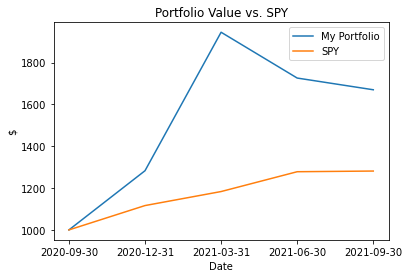

In [78]:
# plot of portfolio totals vs. SPY if buy and hold
plt.plot(SPY['Date'], portfolio_val['Portfolio_Total'], label = 'My Portfolio')
plt.plot(SPY['Date'], SPY['SPY_Total'], label = 'SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. SPY')
plt.show()

In [79]:
# test buy/sell 
dates = SPY['Date'].to_list()
dates = dates[:len(dates) - 1]
init_investment = 5000
total_invested = init_investment
portfolio_value = init_investment
portfolio_test = pd.DataFrame({})
sell_stocks = pd.DataFrame({})
test = 0
tickers = new_df['Symbol'].to_list()
for i, d in enumerate(dates):
    
    # get predictions on test data
    predict = historical_data.loc[X_test.index]
    predict = predict[predict['fiscalDateEnding'] == d]
    predict = X_test.loc[predict.index]
    predicted = model.predict(predict)
    
    # find stocks that are predicted to increase by more than 15%
    increase_df = historical_data.loc[predict.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
    increase_df['predicted'] = predicted
    increase_df['percentChangePredicted'] = ((increase_df['predicted'] - increase_df['currentQuarterPrice']) / increase_df['currentQuarterPrice']) * 100
    increase_df = increase_df[increase_df['percentChangePredicted'] > 15]
    increase_df = increase_df[increase_df['Symbol'] != 'GE']
    
    # find stocks that are predicted to decrease by more than 10%
    decrease_df = historical_data.loc[predict.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
    decrease_df['predicted'] = predicted
    decrease_df['percentChangePredicted'] = ((decrease_df['predicted'] - decrease_df['currentQuarterPrice']) / decrease_df['currentQuarterPrice']) * 100
    decrease_df = decrease_df[decrease_df['percentChangePredicted'] < -15]
    decrease_df = decrease_df[decrease_df['Symbol'] != 'GE']
    
    # get tickers of stocks predicted to increase by more than 15% and decrease more than 10%
    increase_tickers = increase_df['Symbol'].to_list()
    decrease_tickers = decrease_df['Symbol'].to_list()
    
    # 
    df_inc = historical_data[historical_data['Symbol'].isin(increase_tickers)]
    df_inc = df_inc[df_inc['fiscalDateEnding'] == d]
    df_inc['SymbolEnding'] = df_inc['Symbol']
    tickers_len = len(tickers)
    allocation = 1 / tickers_len
    
    
    if i == 0:
        for t in increase_tickers:
            subset = df_inc[df_inc['Symbol'] == t]
            currentPrice = subset.iloc[0]['currentQuarterPrice']
            subset['Cumul. Return'] = subset['currentQuarterPrice'] / currentPrice
            portfolio_test = portfolio_test.append(subset, ignore_index = True)
        portfolio_test['Value'] = allocation * init_investment * portfolio_test['Cumul. Return']
    else:
        current_investments = portfolio_test['Symbol'].to_list()
        sell = []
        buy = []
        
        # check if current investments should be sold (if price is predicted to decrease > 10%)
        for inv in current_investments:
            if inv in decrease_tickers:
                sell.append(inv)
        
        df_dec = historical_data[historical_data['Symbol'].isin(sell)]
        df_dec = df_dec[df_dec['fiscalDateEnding'] == d]
        df_dec['SymbolEnding'] = df_dec['Symbol']
        sell_stocks = sell_stocks.append(df_dec)
                
        # invest more money for stocks predicted to increase after first quarter
        for t in increase_tickers:
            invest_more = 1000
            subset = df_inc[df_inc['Symbol'] == t]
            currentPrice = subset.iloc[0]['currentQuarterPrice']
            subset['Cumul. Return'] = subset['currentQuarterPrice'] / currentPrice
            subset['Value'] = (1 / len(increase_tickers)) * invest_more * subset['Cumul. Return']
            portfolio_test = portfolio_test.append(subset, ignore_index = True)
        total_invested += invest_more * len(increase_tickers)
        
    
portfolio_test['Buy'] = 'Buy'  
portfolio_test

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice,SymbolEnding,Cumul. Return,Value,Buy
0,2020-09-30,USD,62773000000,12340000000,253000000,8300000000,1633000000,1135000000,58988000000,32256000000,...,-2412000000,-2755000000,-2257000000,-2399000000,12.29,15.77,AAL,1.0,5000.0,Buy
1,2020-12-31,USD,267261000000,116744000000,25243000000,49961000000,10808000000,52394000000,126211000000,37083000000,...,-2469000000,-2442000000,181000000,-3810000000,8.79,12.25,F,1.0,1000.0,Buy
2,2021-03-31,USD,345573000000,39647000000,10205000000,10205000000,1303000000,22507000000,305926000000,94876000000,...,5956000000,8046000000,12220000000,5245000000,58.15,56.03,VZ,1.0,1000.0,Buy
3,2021-06-30,USD,72464000000,22647000000,325000000,18000000000,1789000000,1249000000,29342000000,37449000000,...,58000000,495000000,976000000,19000000,21.21,20.52,AAL,1.0,1000.0,Buy


In [80]:
# get all stocks that should be sold
sell_stocks['Sell'] = 'Sell'
sell_stocks

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice,SymbolEnding,Sell


In [81]:
# combine buy and sell into one dataframe
portfolio = pd.DataFrame({})
portfolio = portfolio.append(portfolio_test)
if len(sell_stocks) > 0:
    portfolio = portfolio.append(sell_stocks)
portfolio = portfolio.sort_values(by = ['Symbol', 'fiscalDateEnding', 'Buy'])
portfolio

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice,SymbolEnding,Cumul. Return,Value,Buy
0,2020-09-30,USD,62773000000,12340000000,253000000,8300000000,1633000000,1135000000,58988000000,32256000000,...,-2412000000,-2755000000,-2257000000,-2399000000,12.29,15.77,AAL,1.0,5000.0,Buy
3,2021-06-30,USD,72464000000,22647000000,325000000,18000000000,1789000000,1249000000,29342000000,37449000000,...,58000000,495000000,976000000,19000000,21.21,20.52,AAL,1.0,1000.0,Buy
1,2020-12-31,USD,267261000000,116744000000,25243000000,49961000000,10808000000,52394000000,126211000000,37083000000,...,-2469000000,-2442000000,181000000,-3810000000,8.79,12.25,F,1.0,1000.0,Buy
2,2021-03-31,USD,345573000000,39647000000,10205000000,10205000000,1303000000,22507000000,305926000000,94876000000,...,5956000000,8046000000,12220000000,5245000000,58.15,56.03,VZ,1.0,1000.0,Buy


In [82]:
# get date of which to calculate return on investment up to
df = portfolio.copy()
df['Date'] = df['fiscalDateEnding']
df['lastDate'] = ''
for i in df.index:
    if len(sell_stocks) > 0:
        if df.loc[i]['Sell'] != 'Sell':
            lastDate = ""
            subset = df[df['Symbol'] == df.loc[i]['Symbol']]
            subset = subset[subset['Sell'] == 'Sell']
            if len(subset) == 0:
                lastDate = '2021-09-30'
            else:
                if subset.iloc[0]['fiscalDateEnding'] > df.loc[i]['fiscalDateEnding']:
                    lastDate = subset.iloc[0]['fiscalDateEnding']
                else:
                    lastDate = '2021-09-30'
            df.at[i, 'lastDate'] = lastDate
    else:
        df.at[i, 'lastDate'] = '2021-09-30'
df

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice,SymbolEnding,Cumul. Return,Value,Buy,Date,lastDate
0,2020-09-30,USD,62773000000,12340000000,253000000,8300000000,1633000000,1135000000,58988000000,32256000000,...,-2257000000,-2399000000,12.29,15.77,AAL,1.0,5000.0,Buy,2020-09-30,2021-09-30
3,2021-06-30,USD,72464000000,22647000000,325000000,18000000000,1789000000,1249000000,29342000000,37449000000,...,976000000,19000000,21.21,20.52,AAL,1.0,1000.0,Buy,2021-06-30,2021-09-30
1,2020-12-31,USD,267261000000,116744000000,25243000000,49961000000,10808000000,52394000000,126211000000,37083000000,...,181000000,-3810000000,8.79,12.25,F,1.0,1000.0,Buy,2020-12-31,2021-09-30
2,2021-03-31,USD,345573000000,39647000000,10205000000,10205000000,1303000000,22507000000,305926000000,94876000000,...,12220000000,5245000000,58.15,56.03,VZ,1.0,1000.0,Buy,2021-03-31,2021-09-30


In [83]:
# add quarters between fiscalDateEnding and lastDate
if len(sell_stocks) > 0:
    df = df[df['Sell'] != 'Sell']
    

# get all dates into a single list
all_dates = list(dates)
all_dates.append('2021-09-30')

columns = []

# setup dataframe to get totals
df_total = pd.DataFrame({'2020-09-30' : [], '2020-12-31' : [], '2021-03-31' : [], '2021-06-30' : [], '2021-09-30' : []})
for i in range(len(df)):
    j = 0
    d = {}
    for x in all_dates:
        d[x] = [0]
    symbol = df.iloc[i]['Symbol']
    stock_date = df.iloc[i]['fiscalDateEnding']
    end_date = df.iloc[i]['lastDate']
    idx = all_dates.index(stock_date)
    idx2 = all_dates.index(end_date)
    
    columns.append(symbol + str(i))

    for j in range(idx, idx2 + 1):
        subset = historical_data[(historical_data['Symbol'] == symbol) & (historical_data['fiscalDateEnding'] == all_dates[j])]
        #subset = subset[subset['fiscalDateEnding'] == all_dates[j]]
        d[all_dates[j]] = [subset.iloc[0]['currentQuarterPrice']]
    df_total = df_total.append(pd.DataFrame(d))
        
df_total = df_total.T
df_total.columns = columns
df_total

,AAL0,AAL1,F2,VZ3
2020-09-30,12.29,0.00,0.00,0.00
2020-12-31,15.77,0.00,8.79,0.00
2021-03-31,23.90,0.00,12.25,58.15
2021-06-30,21.21,21.21,14.86,56.03
2021-09-30,20.52,20.52,14.16,54.01


In [84]:
# change dataframe into long form
df_cumulative = pd.DataFrame({})
for col in df_total.columns:
    subset = pd.DataFrame(df_total[col])
    subset.columns = ['currentQuarterPrice']
    subset['Date'] = df_total.index
    subset['Symbol'] = col
    df_cumulative = df_cumulative.append(subset)
df_cumulative

,currentQuarterPrice,Date,Symbol
2020-09-30,12.29,2020-09-30,AAL0
2020-12-31,15.77,2020-12-31,AAL0
2021-03-31,23.90,2021-03-31,AAL0
2021-06-30,21.21,2021-06-30,AAL0
2021-09-30,20.52,2021-09-30,AAL0
2020-09-30,0.00,2020-09-30,AAL1
2020-12-31,0.00,2020-12-31,AAL1
2021-03-31,0.00,2021-03-31,AAL1
2021-06-30,21.21,2021-06-30,AAL1
2021-09-30,20.52,2021-09-30,AAL1


In [85]:
# get count of number of stocks bought on each date and number of stocks sold on each date
indexes = df_total.index
columns = df_total.columns
d = {}
d2 = {}
for i in range(len(indexes)):
    count = 0
    count2 = 0
    for c in columns:
        if i == 0:
            if df_total.iloc[i][c] != 0:
                count += 1
        else:
            if df_total.iloc[i][c] != 0 and df_total.iloc[i - 1][c] == 0:
                count += 1
            if df_total.iloc[i][c] == 0 and df_total.iloc[i - 1][c] != 0:
                count2 += 1
    d[indexes[i]] = count
    d2[indexes[i - 1]] = count2
print(d2)
d

{'2021-09-30': 0, '2020-09-30': 0, '2020-12-31': 0, '2021-03-31': 0, '2021-06-30': 0}


{'2020-09-30': 1,
 '2020-12-31': 1,
 '2021-03-31': 1,
 '2021-06-30': 1,
 '2021-09-30': 0}

In [86]:
# trying to get cumulative return and value
tickers = df_cumulative['Symbol'].unique()
df2 = pd.DataFrame({})
for t in tickers:
    subset = df_cumulative[df_cumulative['Symbol'] == t]
    subset2 = subset[subset['currentQuarterPrice'] != 0]
    subset2 = subset2.sort_values(by = ['Date'])
    subset['Cumul. Return'] = subset['currentQuarterPrice'] / float(subset2.iloc[0]['currentQuarterPrice'])
    if subset2.iloc[0]['Date'] == all_dates[0]:
        subset['Value'] = 1 / d[all_dates[0]] * 5000 * subset['Cumul. Return']
    else:
        # need to check if rows before are 0 since len() is counting stocks that are being held instead of just bought
        subset['Value'] = 1 / d[subset2.iloc[0]['Date']] * 1000 * subset['Cumul. Return']
    df2 = df2.append(subset)
#df2['Value'] = (1 / len(tickers)) * 5000 * df2['Cumul. Return']
df2

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_49222/2289787068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Cumul. Return'] = subset['currentQuarterPrice'] / float(subset2.iloc[0]['currentQuarterPrice'])
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_49222/2289787068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Value'] = 1 / d[all_dates[0]] * 5000 * subset['Cumul. Return']
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_49222/2289787068.py:1

,currentQuarterPrice,Date,Symbol,Cumul. Return,Value
2020-09-30,12.29,2020-09-30,AAL0,1.000000,5000.000000
2020-12-31,15.77,2020-12-31,AAL0,1.283157,6415.785191
2021-03-31,23.90,2021-03-31,AAL0,1.944670,9723.352319
2021-06-30,21.21,2021-06-30,AAL0,1.725793,8628.966640
2021-09-30,20.52,2021-09-30,AAL0,1.669650,8348.250610
2020-09-30,0.00,2020-09-30,AAL1,0.000000,0.000000
2020-12-31,0.00,2020-12-31,AAL1,0.000000,0.000000
2021-03-31,0.00,2021-03-31,AAL1,0.000000,0.000000
2021-06-30,21.21,2021-06-30,AAL1,1.000000,1000.000000
2021-09-30,20.52,2021-09-30,AAL1,0.967468,967.468175


In [87]:
# get portfolio totals
all_vals = []
for t in tickers:
    all_vals.append(df2[df2['Symbol'] == t]['Value'])
portfolio_val = pd.DataFrame({})
tickers.sort()
for a, t in zip(all_vals, tickers):
    #print(a, t)
    #if len(a.to_list()) == 5:
    portfolio_val[t] = a.to_list()
portfolio_val['Portfolio_Total'] = round(portfolio_val.sum(axis = 1))
portfolio_val 

,AAL0,AAL1,F2,VZ3,Portfolio_Total
0,5000.000000,0.000000,0.000000,0.000000,5000.0
1,6415.785191,0.000000,1000.000000,0.000000,7416.0
2,9723.352319,0.000000,1393.629124,1000.000000,12117.0
3,8628.966640,1000.000000,1690.557452,963.542562,12283.0
4,8348.250610,967.468175,1610.921502,928.804815,11855.0


In [88]:
total_investments = []
total = 5000
for key in list(d.keys()):
    if key == all_dates[0]:
        total_investments.append(5000)
    else:
        if d[key] != 0:
            total += 1000
            total_investments.append(total)
        else:
            total_investments.append(total)
total_investments

[5000, 6000, 7000, 8000, 8000]

In [89]:
portfolio_val['Amount Invested'] = total_investments
print(portfolio_val.loc[4]['Portfolio_Total'] / portfolio_val.loc[4]['Amount Invested'])
portfolio_val

1.481875


,AAL0,AAL1,F2,VZ3,Portfolio_Total,Amount Invested
0,5000.000000,0.000000,0.000000,0.000000,5000.0,5000
1,6415.785191,0.000000,1000.000000,0.000000,7416.0,6000
2,9723.352319,0.000000,1393.629124,1000.000000,12117.0,7000
3,8628.966640,1000.000000,1690.557452,963.542562,12283.0,8000
4,8348.250610,967.468175,1610.921502,928.804815,11855.0,8000


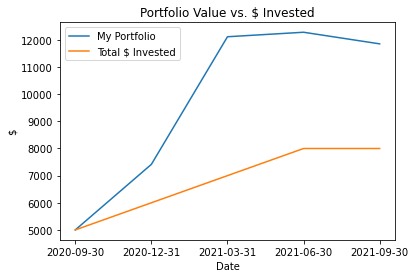

In [90]:
# plot of portfolio vs amount invested if not following buy/sell patterns
plt.plot(SPY['Date'], portfolio_val['Portfolio_Total'], label = 'My Portfolio')
plt.plot(SPY['Date'], total_investments, label = 'Total $ Invested')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. $ Invested')
plt.show()

In [91]:
# get SPY value if following same buy patterns
# compare investments to SPY
init_investment = 1000
SPY = pd.read_csv("SPY.csv")
SPY.columns = ['Date', 'open', 'high', 'low', 'close', 'volume']
#SPY = SPY.set_index('Date')
SPY = SPY[SPY['Date'] >= '2020-09-30']
SPY

,Date,open,high,low,close,volume
0,2022-02-10,450.68,458.120,443.830,449.32,875173665
1,2022-01-31,476.30,479.980,420.760,449.91,2478637614
2,2021-12-31,461.64,479.000,448.920,474.96,1926485453
3,2021-11-30,460.30,473.540,455.300,455.56,1329958701
4,2021-10-29,430.98,459.560,426.360,459.25,1508665331
5,2021-09-30,452.56,454.050,428.780,429.14,1745953627
6,2021-08-31,440.34,453.070,436.100,451.56,1253428256
7,2021-07-30,428.87,441.800,421.970,438.51,1420579578
8,2021-06-30,422.57,428.780,414.700,428.06,1281016394
9,2021-05-28,419.43,422.815,404.000,420.04,1527034281


In [92]:
f_date = ['2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30']
SPY = SPY[SPY['Date'].isin(f_date)]
SPY = SPY.sort_values(by = ['Date'])
SPY['Cumul. Return'] = SPY['close'] / float(SPY.iloc[0]['close'])
SPY['Total_Invested'] = total_investments
#SPY['SPY_Total'] = init_investment * SPY['Cumul. Return']
SPY['Total'] = np.nan


SPY

,Date,open,high,low,close,volume,Cumul. Return,Total_Invested,Total
17,2020-09-30,350.21,358.75,319.80,334.89,1815146487,1.000000,5000,NaN
14,2020-12-31,365.57,378.46,362.03,373.88,1342397107,1.116426,6000,NaN
11,2021-03-31,385.59,398.12,371.88,396.33,2401881132,1.183463,7000,NaN
8,2021-06-30,422.57,428.78,414.70,428.06,1281016394,1.278211,8000,NaN
5,2021-09-30,452.56,454.05,428.78,429.14,1745953627,1.281436,8000,NaN


In [93]:
idxs = SPY.index
SPY.at[idxs[0], 'Total'] = 5000
for i in range(1, len(idxs)):
    SPY.at[idxs[i], 'Total'] = (SPY.at[idxs[i], 'Cumul. Return'] * SPY.at[idxs[i - 1], 'Total_Invested']) + (SPY.at[idxs[i], 'Total_Invested'] - SPY.at[idxs[i - 1], 'Total_Invested'])
SPY

,Date,open,high,low,close,volume,Cumul. Return,Total_Invested,Total
17,2020-09-30,350.21,358.75,319.80,334.89,1815146487,1.000000,5000,5000.000000
14,2020-12-31,365.57,378.46,362.03,373.88,1342397107,1.116426,6000,6582.131446
11,2021-03-31,385.59,398.12,371.88,396.33,2401881132,1.183463,7000,8100.779360
8,2021-06-30,422.57,428.78,414.70,428.06,1281016394,1.278211,8000,9947.475290
5,2021-09-30,452.56,454.05,428.78,429.14,1745953627,1.281436,8000,10251.485562


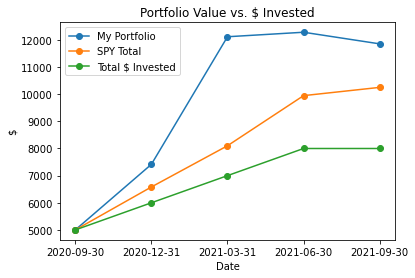

In [97]:
plt.plot(SPY['Date'], portfolio_val['Portfolio_Total'], '-o' ,label = 'My Portfolio')
plt.plot(SPY['Date'], SPY['Total'], '-o', label = 'SPY Total')
plt.plot(SPY['Date'], total_investments, '-o', label = 'Total $ Invested')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. $ Invested')
plt.show()

In [ ]:
# sell if prices increase by certain amount
# def test_trading_algo(historical_data, predictions, buy = 15, sell = -15):
#    pass

In [ ]:
# How do I backtest trading algorithm correctly with buying and selling?
# Different trading algorithms? Sell if price increases more than 10%
# Sell after each quarter
# make training/testing ~50% each
# can invest earnings